(HW5)=
# HW5


## Task 5.1 (1.5 points)

For a one-dimensional gaussian $\xi \sim \mathcal N(\mu, \sigma^2)$ there are well-known rules of one, two and three sigmas:

* one-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant \sigma) = \Phi(1) - \Phi(-1) \approx 0.6827$ 
* two-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant 2\sigma) = \Phi(2) - \Phi(-2) \approx 0.9545$ 
* three-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant 3\sigma) = \Phi(3) - \Phi(-3) \approx 0.9973$ 

```{figure} https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201202/20120208160239-1_0.jpg?itok=1X1a_HCs
:align: center
```

In [4]:
from scipy.stats import norm

norm.cdf(1) - norm.cdf(-1), norm.cdf(2) - norm.cdf(-2), norm.cdf(3) - norm.cdf(-3)

(0.6826894921370859, 0.9544997361036416, 0.9973002039367398)

Compute analagous values for a 2-d gaussian distribution $\boldsymbol \xi \sim \mathcal N(\boldsymbol 0, \boldsymbol I_2)$. Namely, find $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 1)$, $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 2)$, $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 3)$.

**Note:** this problem assumes analytic solution. If you provide a reliable numeric solution, you'll receive $0.3$ points as bonus.

### YOUR SOLUTION HERE

Firstly, we need to use the formula for the distribution of the Euclidean norm of a two-dimensional standard normal random vector.The pdf of the Euclidean norm $P(\Vert\boldsymbol \xi\Vert_2)$:
$$f_{R}(r) = re^{-\frac{r^{2}}{2}}$$, where r = 1,2,3.

The cdf, which gives the probability that R is less than or equal to r, is found by integrating the pdf from 0 to r:
$$F_{R}(r) = \int_{0}^r se^{-\frac{s^{2}}{2}}ds = 1 - e^{-\frac{r^{2}}{2}} $$


$\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 1) = 1 - e^{-\frac{1^{2}}{2}} $,
$\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 2) = 1 - e^{-\frac{2^{2}}{2}} $,
$\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 3) = 1 - e^{-\frac{3^{2}}{2}} $.

In [1]:
import numpy as np

probabilities = [1 - np.exp(-r**2 / 2) for r in [1, 2, 3]]
probabilities

[0.3934693402873666, 0.8646647167633873, 0.9888910034617577]

Let make Monte Carlo simulation. 
From some source on the Internet: 
Monte Carlo simulation involves generating a large number of samples from the two-dimensional Gaussian distribution and then estimating the probability as the fraction of samples that fall within a distance r from the origin. This method is straightforward to implement and easily scales with dimensionality, but its accuracy depends on the number of samples used.

In [4]:
from numpy.random import normal
from numpy.linalg import norm

n_samples = 1000000

samples = normal(size=(n_samples, 2))

dist = norm(samples, axis=1)

mc_probabilities = [(dist <= r).mean() for r in [1, 2, 3]]
mc_probabilities

[0.394094, 0.864726, 0.98878]

Very close to what I calculated!

## Task 5.2 (1.5 points)

Let $X_1, \ldots, X_n$ is an i.i.d. sample from $\mathcal N(0, \sigma^2)$ and $\widehat \sigma = \frac 1n \sum\limits_{i=1}^n |X_i|$.

* Find bias, se and MSE of the estimation $\widehat \sigma$. Is this estimation unbiased? (**0.7 points**)
* If $\widehat \sigma$ turned out to be biased, fix it to get an unbiased estimation of $\sigma$. Find se of this corrected estimation. Is it consistent? Justify your answer. (**0.8 points**)

### YOUR SOLUTION HERE
A.

1) Distribution with $\mathcal N(0, \sigma^2)$ is known as a half-normal distribution. The expected value of a half-normal distribution, with mean = 0 and variance = $\sigma^2$ is $E[\widehat \sigma] = \sigma\sqrt{\frac{2}{\pi}}$. $$Bias(\widehat \sigma) = E[\widehat \sigma] - \sigma = \sigma (\sqrt{\frac {2}{\pi}} -1)$$ This indicates that $\sigma$ is biased since the bias is not zero.


2) Standard error for half-normal distribution $\mathbb{V}(|X_i|) = \sigma^2 (1 - \frac {2}{\pi}).$ Therefore, $\mathbb{V}(\widehat \sigma) = \frac{\mathbb{V}(|X_i|)}{n} = \frac{\sigma^2 (1 - \frac {2}{\pi})}{n}.$
$$SE = \sqrt{\mathbb{V}(\widehat \sigma)} = \sigma \sqrt{\frac{1-\frac{2}{\pi}}{n}}$$


3) Mean Squared Error of  $\widehat \sigma$ is defined as $MSE = Bias^2 + \mathbb{V}(\widehat \sigma).$
$$MSE = \sigma^2 ((\sqrt{\frac{2}{\pi}} - 1)^2 + (\frac{1-\frac{2}{\pi}}{n}))$$

B.

1) Given that $E[\widehat \sigma] = \sigma\sqrt{\frac{2}{\pi}}$. We can make $\widehat \sigma$ unbiased by dividing by $\sqrt{\frac{2}{\pi}}$.
$$\widehat \sigma_{unbiased} = \frac{\widehat \sigma}{\sqrt{\frac{2}{\pi}}}$$

2) SE of the Corrected Estimation: $$\frac{SE}{\sqrt{\frac{2}{\pi}}} = \sigma \sqrt{\frac{2-\pi}{2n}} $$

3) An estimator is consistent if it converges in probability to the parameter it estimates as the sample size n goes to infinity. $$\lim_{n \to \inf}\sigma\sqrt{\frac{2-\pi}{2n}} = 0$$ Therefore, $\widehat \sigma_{unbiased}$ is consistent.

## Task 5.3 (1 point)


Let $X_1, \ldots, X_n$ is an i.i.d. sample form $U[0, 2\theta]$. The parameter $\theta$ can be estimated as
$\widehat\theta = \overline X_n$ (sample average) or $\tilde\theta = \mathrm{med}(X_1, \ldots, X_n)$ (sample median). According to ML Handbook, both estimations are unbiased, and $\mathbb V \widehat\theta = \frac{\theta^2}{3n}$, $\mathbb V \tilde\theta = \frac{\theta^2}{n+3}$. Hence, due to the central limit theorem

$$
    \widehat\theta \approx \mathcal N\Big(\theta, \frac{\theta^2}{3n}\Big), \quad
    \tilde\theta \approx \mathcal N\Big(\theta, \frac{\theta^2}{n+3}\Big), \quad n \gg 1.
$$

Plot two histograms on the same plot verifying this theoretical statements. Add two dashed lines for gaussians as it done {ref}`here <CLT>`.

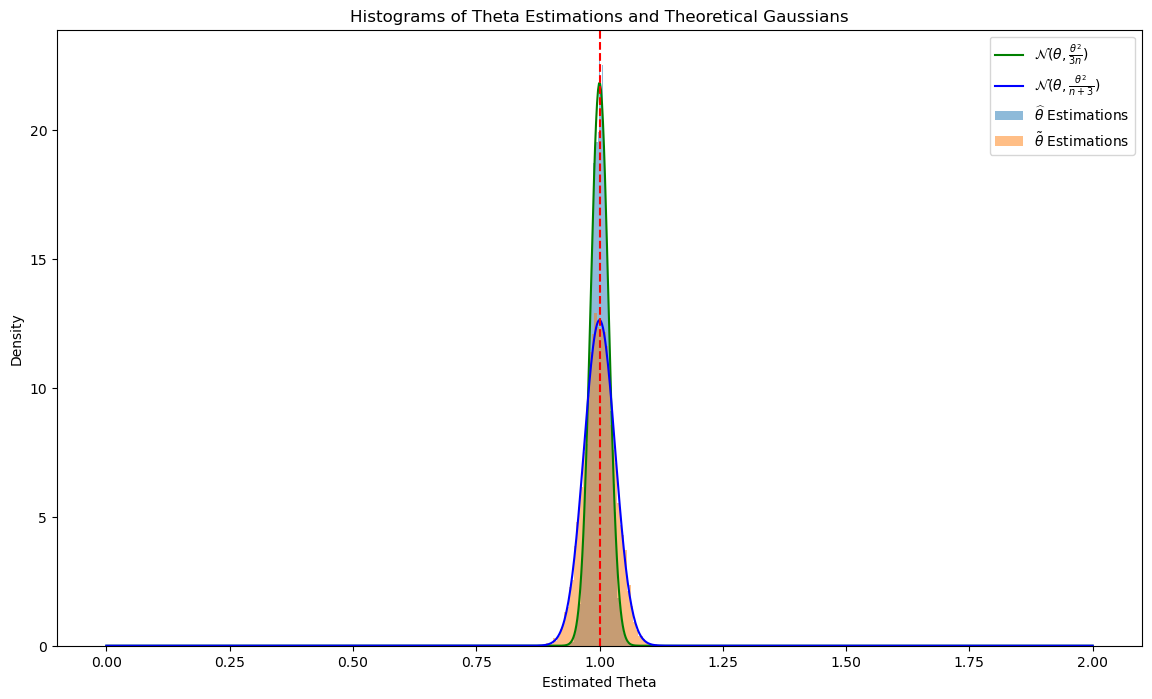

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm

theta = 1  # You can change the value of theta and verify given theoretical statements with difference values of theta

n = 1000


samples = uniform.rvs(0, 2*theta, size=n)


var_sample_avg = theta**2 / (3*n)
var_sample_med = theta**2 / (n+3)


x = np.linspace(0, 2*theta, 1000)
normal_avg = norm.pdf(x, theta, np.sqrt(var_sample_avg))
normal_med = norm.pdf(x, theta, np.sqrt(var_sample_med))


estimates_avg = []
estimates_med = []


for _ in range(10000):
    samples = uniform.rvs(0, 2*theta, size=n)
    estimates_avg.append(np.mean(samples))
    estimates_med.append(np.median(samples))


plt.figure(figsize=(14,8))
plt.hist(estimates_avg, bins=50, density=True, alpha=0.5, label=r'$\widehat{\theta}$ Estimations')
plt.hist(estimates_med, bins=50, density=True, alpha=0.5, label=r'$\tilde{\theta}$ Estimations')


plt.plot(x, normal_avg, 'g', linewidth=1.5, label=r'$\mathcal{N}(\theta, \frac{\theta^2}{3n})$')
plt.plot(x, normal_med, 'b', linewidth=1.5, label=r'$\mathcal{N}(\theta, \frac{\theta^2}{n+3})$')
plt.axvline(x=theta, color='r', linestyle='--')

plt.title('Histograms of Theta Estimations and Theoretical Gaussians')
plt.xlabel('Estimated Theta')
plt.ylabel('Density')
plt.legend()
plt.show()
